### ROI Extractor 

During the visual data analysis I noticed that there is a large variation in the arrangement of the object in the images. In addition, some objects occupy only a small part of the image. By converting (resizing) without ROI extraction we have a very inefficient use of the reduced image. Most of the picture is blank.

**Solution:**
- annotate data - I annotated about 500 images in a human in the loop technique (3 models were created - I started from 300 images and ended up about 500) 
- train object detector - I used yolov5 (small - balance between accuracy and speed) 

**Result on train DS:**
* 54601 images processed successfully 
* 105 images - detection failed

Model performance (on my validation DS):
* mAP@50 -> 0.995      
* mAP50-95 -> 0.914

<div class="alert alert-warning">If you are interested in:
    <ul>
        <li>Annotation dataset</li>
        <li>yolov5 training notebook</li>
    </ul>
    <p>&nbsp;</p>
Let me know in comment. I will provide it as well in separate notebooks.</div>

**Next steps:**
* generate ROI based dataset for training (768 pix) -> is available here: https://www.kaggle.com/datasets/remekkinas/rsna-breast-cancer-detection-poi-images
* use ROI extractor in inference part 

In [1]:
%%capture 

# Clone yolov5 repository
!git clone https://github.com/ultralytics/yolov5

In [2]:
import torch
import glob
import random
import cv2
import matplotlib.pyplot as plt

In [3]:
# Load trained model
model = torch.hub.load('./yolov5', 'custom', path='/kaggle/input/rsna-breast-cancer-detection-roi-model/rsna-roi-003.pt', source='local')

YOLOv5 🚀 v7.0-12-g7f5724b Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients
Adding AutoShape... 


In [4]:
# Create list of input files 
# I use Radek Osmulski dataset -> https://www.kaggle.com/datasets/radek1/rsna-mammography-images-as-pngs 

file_list = glob.glob('/kaggle/input/rsna-mammography-images-as-pngs/images_as_pngs_768/train_images_processed_768/*/*.png')

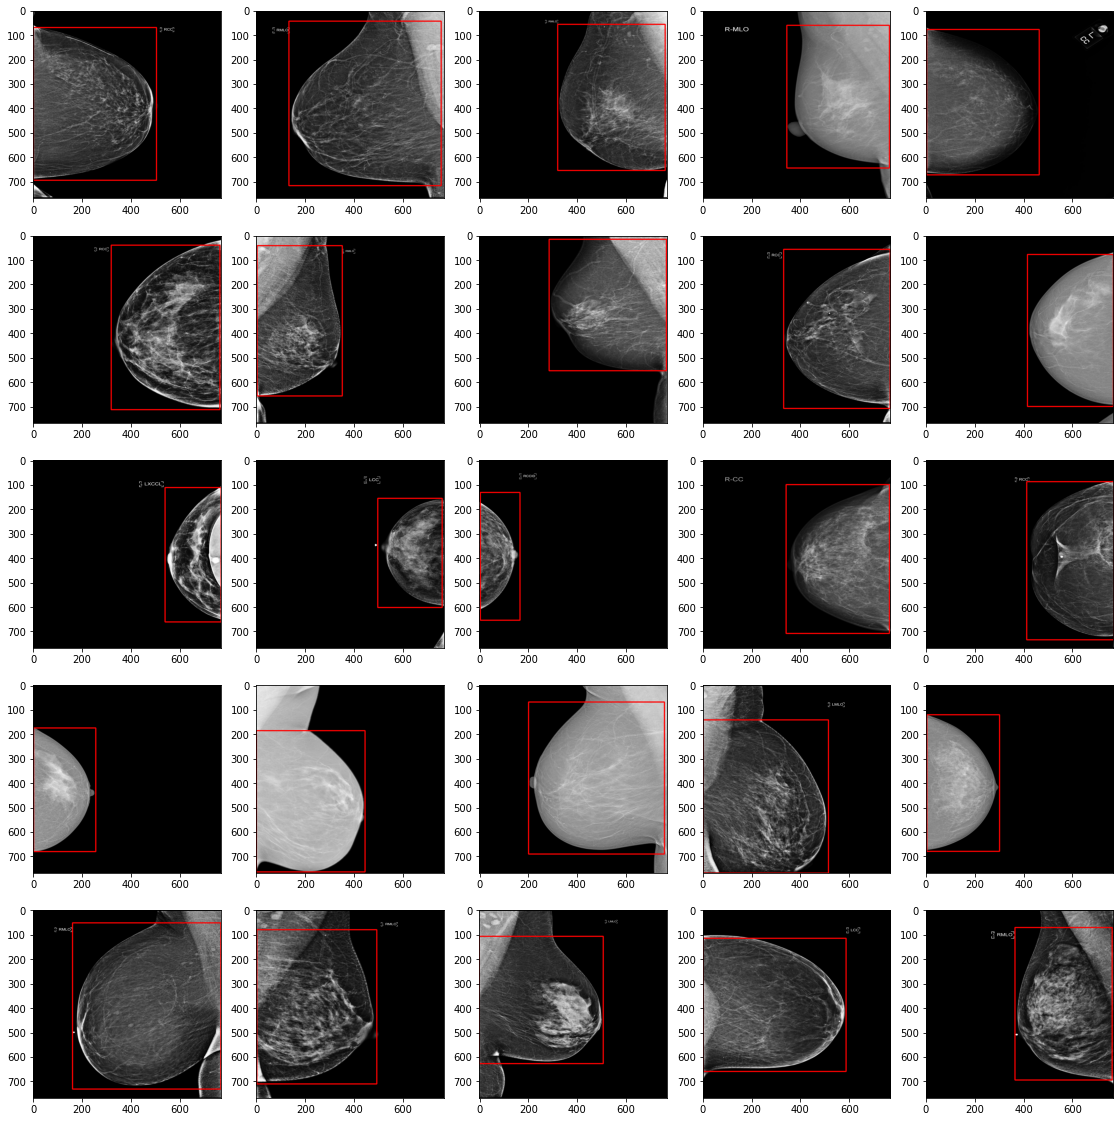

In [5]:
%matplotlib inline
images = []

for img_file in random.sample(file_list, 25):  # it is fixed to 25 random predictions - if you want to change it remeber to change plot_roi as well
    
    # Read file from file
    frame = cv2.imread(img_file)
    
    # Make prediction
    detections = model(frame)
    
    # Convert results to Pandas style
    results = detections.pandas().xyxy[0].to_dict(orient="records")
    
    # Plot result (in 99.99% it predicts only one instance - certainly you can assure that only best prediction is used)
    for result in results:
        images.append(cv2.rectangle(frame, (int(result['xmin']), int(result['ymin'])), (int(result['xmax']), int(result['ymax'])), (255,0,0), 4))

# Plot result
fig, axes = plt.subplots(5, 5, figsize=(20,20))
    
for idx, image in enumerate(images):
    i = idx % 5 
    j = idx // 5 
    axes[i, j].imshow(image)

plt.subplots_adjust(wspace=0, hspace=.2)
plt.show()

Thank you! This is my first contribution to RSNA Screening Mammography Breast Cancer Detection.

Have a nice day and competition.